In [366]:
# Essential tools for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Modelling and Tuning tools
from sklearn.model_selection import train_test_split
from sklearn import tree, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

# Setting current working directory
import os
os.chdir(r'C:\Users\QQ\Documents\Learning\The Data Science Course')
import warnings
warnings.filterwarnings("ignore")
colors = ["#69b3a2", "#4374B3"]
sns.set_palette(sns.color_palette(colors))

In [367]:
data = pd.read_csv('Bank_Churn_Data.csv')

In [368]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [369]:
data.shape

(10000, 14)

In [370]:
df = data.copy()

In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [372]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [373]:
df.drop(['RowNumber', 'CustomerId','Surname'], axis = 1, inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Exploratory Data Analysis

Text(0.5, 1.0, 'Distribution of Customer Churn')

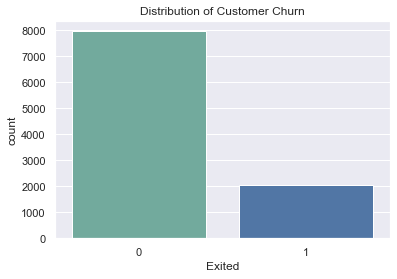

In [374]:
sns.countplot(x= df['Exited'])
plt.title('Distribution of Customer Churn')

Target variable of churn appears to be highly imbalanced, with much less customers churning in comparison to customers retained

In [375]:
# Remapping values of coded categorical variables for easier iteration in Univariate plots
df['IsActiveMember'] = df['IsActiveMember'].map({1: 'Yes',0:'No'})
df['HasCrCard'] = df['HasCrCard'].map({1: 'Yes',0:'No'})

In [376]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,0
2,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,1
3,699,France,Female,39,1,0.00,2,No,No,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,0


In [377]:
cat_vars = [var for var in df.columns if df[var].dtype == 'object']
cont_vars = [var for var in df.columns if df[var].dtype != 'object']

### Univariate Analysis

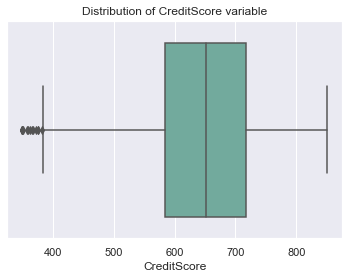

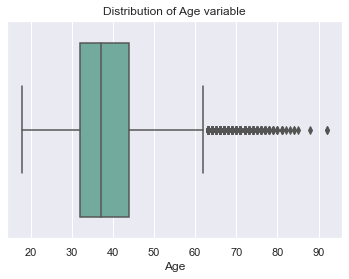

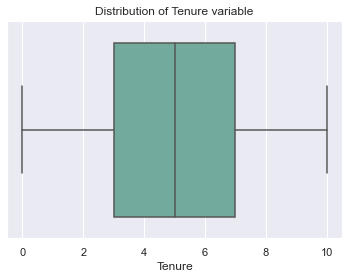

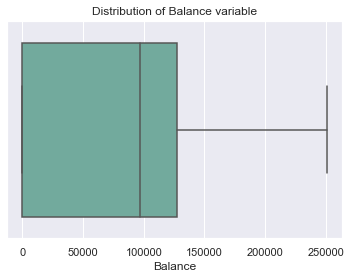

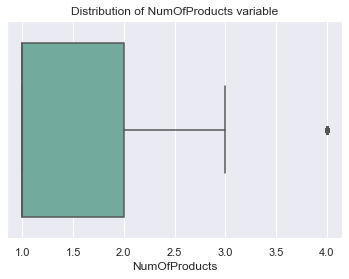

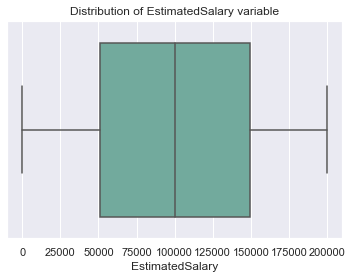

<Figure size 432x288 with 0 Axes>

In [378]:
for var in cont_vars:
    if var != 'Exited':
        sns.boxplot(df[var])
        plt.title('Distribution of ' +var+' variable')
        plt.figure()

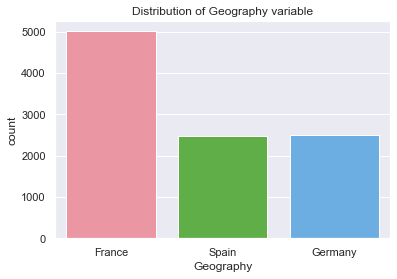

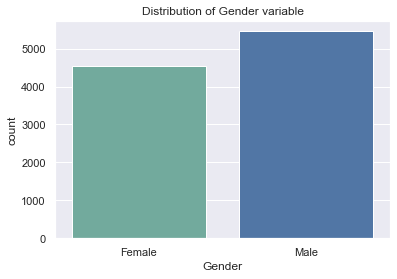

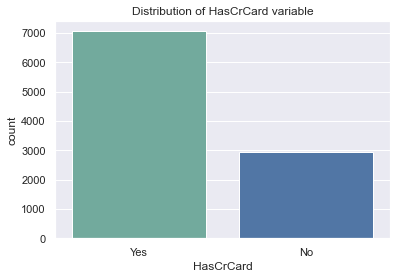

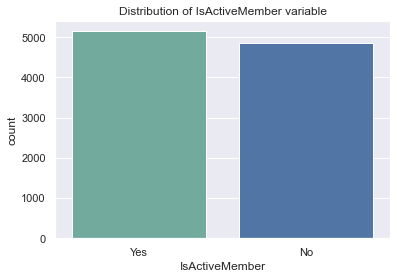

<Figure size 432x288 with 0 Axes>

In [379]:
sns.set_palette(sns.color_palette(colors))
for var in cat_vars:
    sns.countplot(df[var])
    plt.title('Distribution of '+var+' variable')
    plt.figure()

### Bivariate Analysis

##### Real cost of Customer Churn
Customer churn distribution indicates that the bank was able to retain more customers than they churned but this isn't representative of the scale of business lost. Examining churn by customer account balance provides a better perspective into the damage to potential business as a result of customer loss.

Text(0.5, 1.0, 'Distribution of Customer churn by Account Balance')

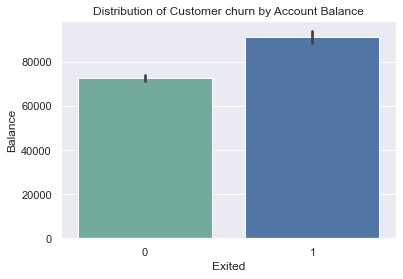

In [380]:
sns.barplot(x=df['Exited'],y=df['Balance'])
plt.title('Distribution of Customer churn by Account Balance')

In [381]:
print('Mean balance of customers retained: ' + str(df['Balance'][df['Exited']==0].mean()))
print('Mean balance of churned customers: ' + str(df['Balance'][df['Exited']==1].mean()))

Mean balance of customers retained: 72745.29677885193
Mean balance of churned customers: 91108.53933726063


Distribution above and mean values indicate customers that exited held larger account balances than customers the business has retained. This is particularly concerning as this is likely detrimental to the business' ability to generate more income and scale for future growth 

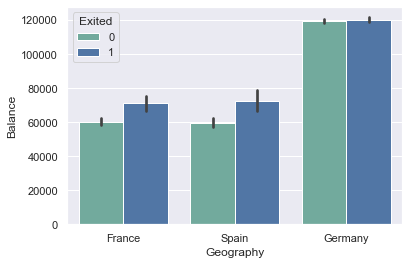

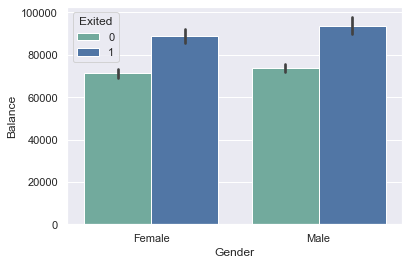

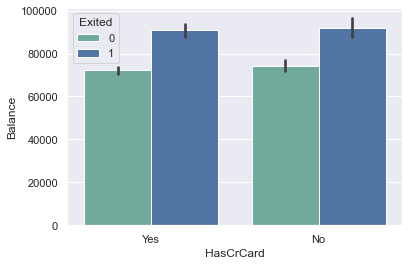

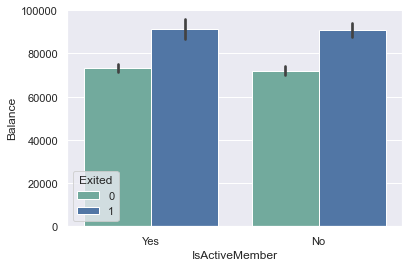

<Figure size 432x288 with 0 Axes>

In [382]:
for var in cat_vars:
    sns.barplot(x= df[var], y=df['Balance'], hue=df['Exited'])
    plt.figure()

Some Observations:
- In France and Spain the account balances of churned customers exceeded balances of those retained
- Distribution of balances of retained:churned customers, although skewed towards churned customers, appears similar across varying levels of our categorical variables.

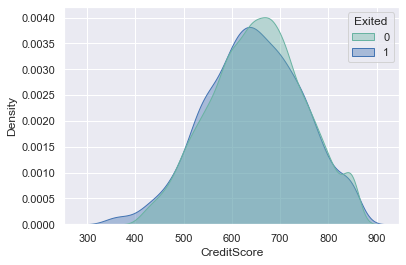

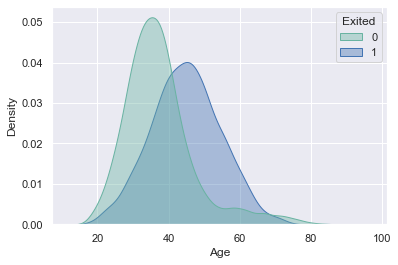

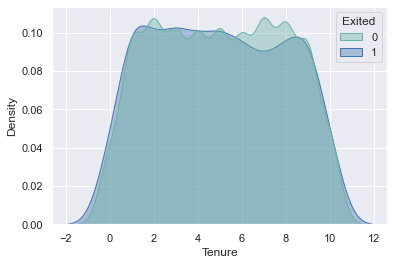

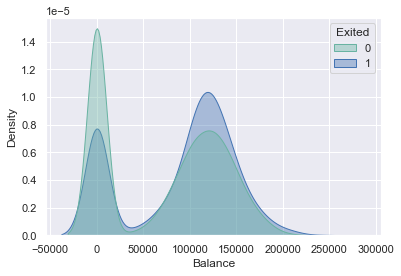

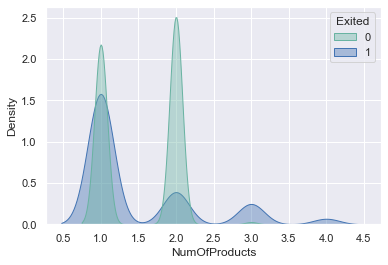

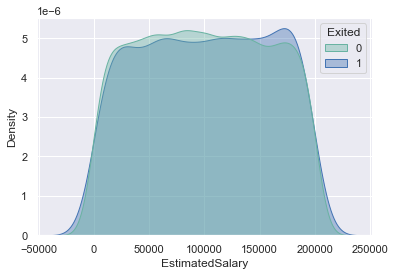

<Figure size 432x288 with 0 Axes>

In [383]:
for var in cont_vars:
    if var != 'Exited':
        sns.kdeplot(data = df, x=var, hue='Exited', fill = True, common_norm=False, alpha=0.4)
        plt.figure()

In addition to churned customers tending to hold larger account balances, additional discoveries include:
- Churned Customers tended to be onlder than those retained
- Significant portion of churned customers only took up one of the bank's products

Comments:
Deeper hypothesis will probably be needed to conclude if some of these observations are significant but if the assessment is correct, the bank will likely need to look into finding more ways to appeal to older customers while also trying to get customers to take up more of the bank's product offerings.

In [384]:
np.percentile(df['CreditScore'],99)

850.0

### Outlier Treatment

Outliers will be capped accordingly:
 - Values greater than a cap of q3 + 1.5*(iqr) will be set to the cap's value
 - Values less than a cap of q1 - 1.5*(iqr) will be set the cap's value

In [385]:
for var in cont_vars:
    if var != 'Exited':
        q1 = np.quantile(df[var],0.25)
        q3 = np.quantile(df[var],0.75)
        iqr = q3-q1
        upper_limit_cap = q3 + 1.5*(iqr)
        lower_limit_cap = q1 - 1.5*(iqr)
        df[var][df[var]> upper_limit_cap] = upper_limit_cap
        df[var][df[var]< lower_limit_cap] = lower_limit_cap    

In [386]:
# One Hot Encoding
df = pd.get_dummies(df,drop_first= True)

### Data Split

In [387]:
x = df.loc[:,df.columns != 'Exited']
y = df['Exited']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [388]:
print('Size of set of test predictors ' + str(x_test.shape))

Size of set of test predictors (2000, 11)


#### Down Sampling the majority class to account for imbalanced distribution

In [389]:
from sklearn.utils import resample

df_majority = df[df['Exited']==0]
df_minority = df[df['Exited']==1]

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_minority),    # to match minority class
                                 random_state=42) # reproducible results

# Combine majority class with upsampled minority class
df_downsampled = pd.concat([df_minority, df_majority_downsampled])

# Display new class counts
df_downsampled['Exited'].value_counts()

1    2037
0    2037
Name: Exited, dtype: int64

In [390]:
x_downsampled = df_downsampled.loc[:,df_downsampled.columns != 'Exited']
y_downsampled = df_downsampled['Exited']
x_train_down,x_test_down,y_train_down,y_test_down = train_test_split(x_downsampled,y_downsampled,test_size = 0.2)

### Modelling

In [391]:
# Function for creating confusion matrix and classification report
def classification_metrics(model,x_test,y_test):
    y_test_predictions = model.predict(x_test)
    print(" _"*14+"Test Data Metrics"+"_ "*14)
    test_confusion_mat = confusion_matrix(y_test,y_test_predictions)
    ax = sns.heatmap(test_confusion_mat,linewidths=1, annot= True,fmt='g')
    ax.set_title('Test Data Confusion Matrix with labels\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values')
    print(classification_report(y_test,y_test_predictions))

#### Random Forest

In [392]:
# Basic Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators = 200, min_samples_split = 10, random_state = 42)
rf_clf.fit(x_train_down,y_train_down)

RandomForestClassifier(min_samples_split=10, n_estimators=200, random_state=42)

 _ _ _ _ _ _ _ _ _ _ _ _ _ _Test Data Metrics_ _ _ _ _ _ _ _ _ _ _ _ _ _ 
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      1614
           1       0.55      0.89      0.68       386

    accuracy                           0.84      2000
   macro avg       0.76      0.86      0.78      2000
weighted avg       0.89      0.84      0.85      2000



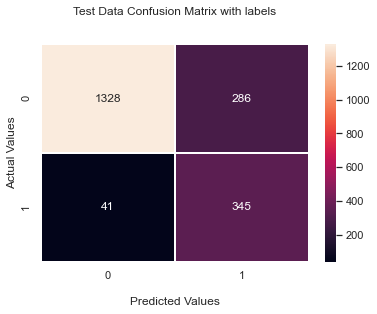

In [393]:
classification_metrics(rf_clf,x_test,y_test)

In [394]:
# Applying Grid Search to Tune parameters
params_grid = {'max_features': [4,6,8,10],
              'min_samples_split':[2,4,8,10],
              'n_estimators': [200,600,1000]}

In [395]:
rf_clf = RandomForestClassifier(n_jobs =-1, random_state=42)
grid_search = GridSearchCV(rf_clf, params_grid, n_jobs = -1, scoring = 'accuracy')

In [396]:
grid_search.fit(x_train_down,y_train_down)

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 6, 8, 10],
                         'min_samples_split': [2, 4, 8, 10],
                         'n_estimators': [200, 600, 1000]},
             scoring='accuracy')

In [397]:
# Settin best estimators to random forest classifier and fitting on downsampled training data
rf_clf = grid_search.best_estimator_
rf_clf.fit(x_train_down,y_train_down)

RandomForestClassifier(max_features=4, min_samples_split=10, n_estimators=600,
                       n_jobs=-1, random_state=42)

 _ _ _ _ _ _ _ _ _ _ _ _ _ _Test Data Metrics_ _ _ _ _ _ _ _ _ _ _ _ _ _ 
              precision    recall  f1-score   support

           0       0.99      0.82      0.90      1614
           1       0.56      0.95      0.71       386

    accuracy                           0.85      2000
   macro avg       0.77      0.89      0.80      2000
weighted avg       0.90      0.85      0.86      2000



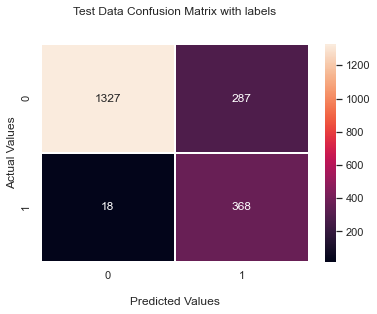

In [398]:
classification_metrics(rf_class,x_test,y_test)

Some improvement in accuracy with tuned model, also notice some improvements in precision, recall and f1 score for churned customers ('Exited' = 1)